In [410]:
!pip install imblearn --quiet

In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.

In [411]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [412]:
data = pd.read_csv('Financial_inclusion_dataset.csv')
schema_data = pd.read_csv('VariableDefinitions (3).csv')
schema_data

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [413]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


<h3><h2>Data Exploration<h>

In [415]:
data.groupby('bank_account')[['bank_account']].count()

,bank_account
bank_account,
No,20212
Yes,3312


In [416]:
data['age_class'] = 0
for i in data['age_of_respondent']:
    if i < 18:
        data['age_class'] = 'Young'
    elif i >=18 and i < 35:
        data['age_class'] = 'Young Adult'
    elif i >=35 and i < 60:
        data['age_class'] = 'Middle_Age'
    else:
        data['age_class'] = 'Senior Citizen'
        



In [417]:
data['age_class']

0        Young Adult
1        Young Adult
2        Young Adult
3        Young Adult
4        Young Adult
            ...     
23519    Young Adult
23520    Young Adult
23521    Young Adult
23522    Young Adult
23523    Young Adult
Name: age_class, Length: 23524, dtype: object

In [418]:
def ageclassification(age_of_respondent):
    for i in age_of_respondent:
        if i < 18:
            data['age_class'] = 'Young'
        elif i >=18 and i < 35:
            data['age_class'] = 'Young Adult'
        elif i >=35 and i < 60:
            data['age_class'] = 'Middle_Age'
        else:
            data['age_class'] = 'Senior Citizen'
        return data['age_class']

In [419]:
data['age_class'] = ageclassification(data['age_of_respondent'])

data['age_class']

0        Young Adult
1        Young Adult
2        Young Adult
3        Young Adult
4        Young Adult
            ...     
23519    Young Adult
23520    Young Adult
23521    Young Adult
23522    Young Adult
23523    Young Adult
Name: age_class, Length: 23524, dtype: object

In [420]:
data.head(30)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_class
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Young Adult
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Young Adult
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Young Adult
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Young Adult
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Young Adult
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed,Young Adult
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed,Young Adult
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government,Young Adult
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Young Adult
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent,Young Adult


In [421]:
data.groupby('cellphone_access')[['bank_account']].count()

,bank_account
cellphone_access,
No,6070
Yes,17454


In [422]:
data.groupby('location_type')[['bank_account']].count()

,bank_account
location_type,
Rural,14343
Urban,9181


In [423]:
def plotter(dataframe, col1, col2, col3, col4, dep):
    plt.figure(figsize=(20,8))
    sns.set(style='dark')

    plt.subplot(1, 4, 1)
    sns.countplot(data= dataframe, x = col1, hue = dep)
    plt.title(f"{col1} vs {dep}")

    plt.subplot(1, 4, 2)
    sns.countplot(data= dataframe, x = col2, hue = dep)
    plt.title(f"{col2} vs {dep}")

    plt.subplot(2, 4, 3)
    sns.countplot(data= dataframe, x = col3, hue = dep)
    plt.title(f"{col3} vs {dep}")

    plt.subplot(2, 4, 4)
    sns.countplot(data= dataframe, x = col4, hue = dep)
    plt.title(f"{col4} vs {dep}")


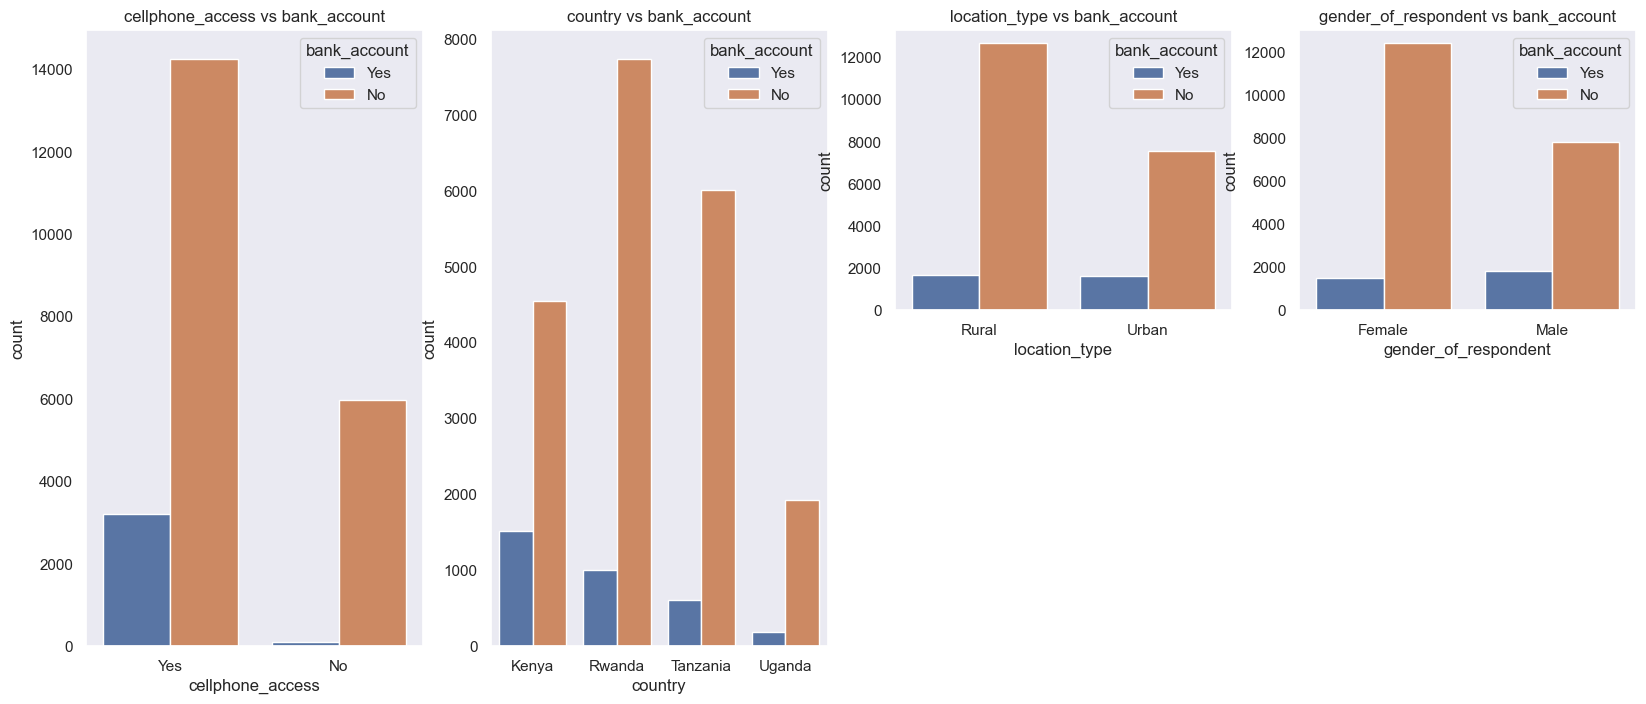

In [424]:
plotter(data, 'cellphone_access','country', 'location_type', 'gender_of_respondent', 'bank_account' )

<h3><h2>Data Cleaning<h>

In [425]:
df = data.copy()
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
age_class                 0
dtype: int64

In [426]:
num = df.select_dtypes(include = 'number')
cat = df.select_dtypes(exclude = 'number')

print('Categorical Data')
display(cat)
print('Numerical Data')
display(num)

Categorical Data


,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_class
0,Kenya,uniqueid_1,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,Young Adult
1,Kenya,uniqueid_2,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,Young Adult
2,Kenya,uniqueid_3,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Young Adult
3,Kenya,uniqueid_4,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Young Adult
4,Kenya,uniqueid_5,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,uniqueid_2113,No,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,Young Adult
23520,Uganda,uniqueid_2114,No,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income,Young Adult
23521,Uganda,uniqueid_2115,No,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income,Young Adult
23522,Uganda,uniqueid_2116,No,Urban,Yes,Female,Parent,Divorced/Seperated,Secondary education,Self employed,Young Adult


Numerical Data


,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26
...,...,...,...
23519,2018,4,48
23520,2018,2,27
23521,2018,5,27
23522,2018,7,30


<h3><h2>Transforming Categorical Data<h>

In [427]:
df.drop('uniqueid', axis = 1, inplace=True)

In [428]:
cat.drop('uniqueid', axis = 1, inplace=True)

In [429]:
encoded = {}
for i in cat.columns:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i +'_encoder'] = encoder


In [430]:
encoded

{'country_encoder': LabelEncoder(),
 'bank_account_encoder': LabelEncoder(),
 'location_type_encoder': LabelEncoder(),
 'cellphone_access_encoder': LabelEncoder(),
 'gender_of_respondent_encoder': LabelEncoder(),
 'relationship_with_head_encoder': LabelEncoder(),
 'marital_status_encoder': LabelEncoder(),
 'education_level_encoder': LabelEncoder(),
 'job_type_encoder': LabelEncoder(),
 'age_class_encoder': LabelEncoder()}

In [431]:
df.describe()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_class
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000,23524.0
mean,1.202091,2016.975939,0.140792,0.390282,0.741966,3.797483,38.805220,0.410092,2.217267,2.392748,1.994941,5.433770,0.0
std,0.925101,0.847371,0.347815,0.487824,0.437562,2.227613,16.520569,0.491861,1.893394,0.999477,1.205290,3.088706,0.0
min,0.000000,2016.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,2016.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.0
50%,1.000000,2017.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,1.000000,2.000000,2.000000,5.000000,0.0
75%,2.000000,2018.000000,0.000000,1.000000,1.000000,5.000000,49.000000,1.000000,5.000000,3.000000,3.000000,9.000000,0.0
max,3.000000,2018.000000,1.000000,1.000000,1.000000,21.000000,100.000000,1.000000,5.000000,4.000000,5.000000,9.000000,0.0


<h3><h2>Data Modelling<h>

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

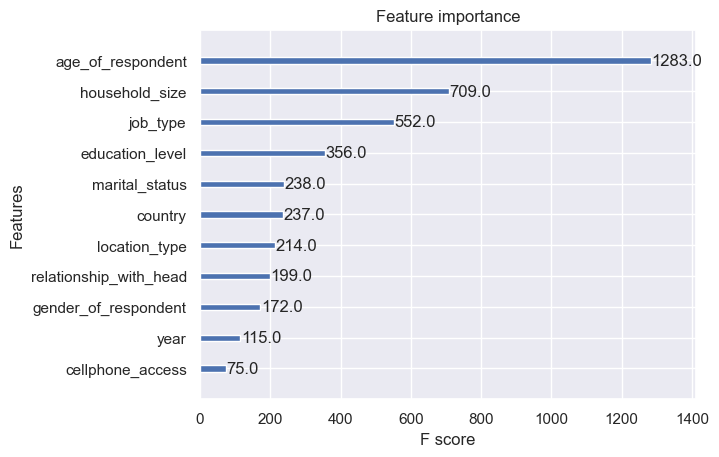

In [432]:
model = xgb.XGBClassifier()

x = df.drop('bank_account', axis = 1)
y = df.bank_account

model.fit(x, y)
xgb.plot_importance(model, importance_type='weight')

In [433]:
df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'age_class'],
      dtype='object')

In [434]:
sel_cols = ['age_of_respondent', 'household_size', 'job_type', 'education_level', 'marital_status', 
             'country','bank_account' ]

df = df[sel_cols]
df.head()

,age_of_respondent,household_size,job_type,education_level,marital_status,country,bank_account
0,24,3,9,3,2,0,1
1,70,5,4,0,4,0,0
2,26,5,9,5,3,0,1
3,34,5,3,2,2,0,0
4,26,8,5,2,3,0,0


In [593]:
x = df.drop('bank_account', axis = 1)
y = df['bank_account']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.40, random_state=20)

display(xtrain.shape)
display(xtest.shape)
display(ytrain.shape)
display(ytest.shape)

(14114, 6)

(9410, 6)

(14114,)

(9410,)

In [690]:
logreg = LogisticRegression()
model_rfn = RandomForestClassifier(n_estimators=90, min_samples_leaf=30,  random_state=100)
model_xgb = xgb.XGBClassifier()
model_naive = GaussianNB()

In [691]:
logreg.fit(xtrain, ytrain)
model_rfn.fit(xtrain, ytrain)
model_xgb.fit(xtrain, ytrain)
model_naive.fit(xtrain, ytrain)

GaussianNB()

In [692]:
#cross validating the predicted y data with actual ytrain 
predicted_log = logreg.predict(xtrain)
print(f"Logistic regression model: \n {classification_report(predicted_log, ytrain)}\n")

predicted_rfn = model_rfn.predict(xtrain)
print(f"RandomForestClassifier model: \n {classification_report(predicted_rfn, ytrain)}\n")

predicted_xgb= model_xgb.predict(xtrain)
print(f"XGBClassifie: \n {classification_report(predicted_xgb, ytrain)}\n")

predicted_naive= model_naive.predict(xtrain)
print(f"Naive_Bayes: \n {classification_report(predicted_naive, ytrain)}\n")

Logistic regression model: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     13561
           1       0.17      0.61      0.27       553

    accuracy                           0.87     14114
   macro avg       0.58      0.74      0.60     14114
weighted avg       0.95      0.87      0.90     14114


RandomForestClassifier model: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94     13455
           1       0.26      0.78      0.39       659

    accuracy                           0.89     14114
   macro avg       0.62      0.83      0.66     14114
weighted avg       0.95      0.89      0.91     14114


XGBClassifie: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     12986
           1       0.46      0.81      0.59      1128

    accuracy                           0.91     14114
   macro avg       0.72      0.86      0.77     1

<Axes: xlabel='bank_account', ylabel='count'>

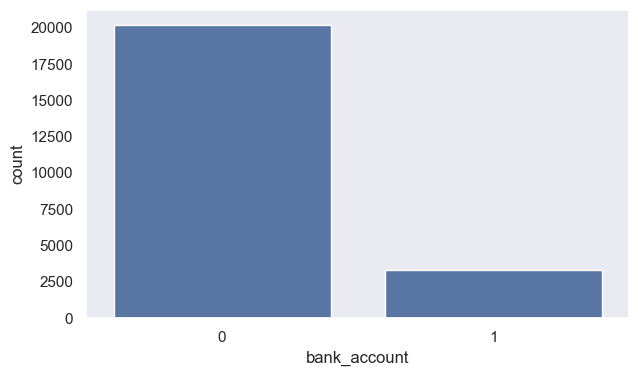

In [693]:
plt.figure(figsize = (7,4))
sns.countplot(data = df, x= df['bank_account'])

In [694]:
smote = SMOTE(sampling_strategy= 'auto', random_state= 5)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='bank_account', ylabel='count'>

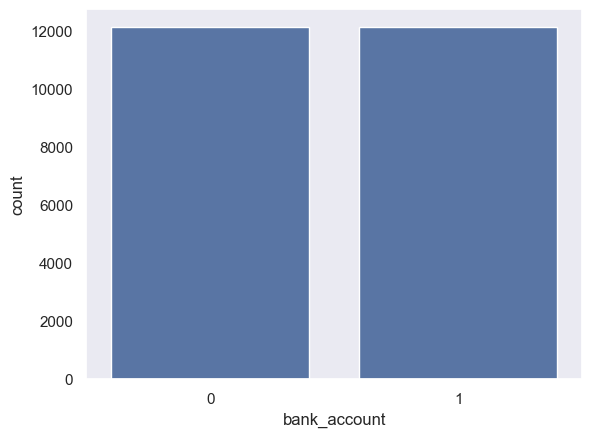

In [695]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['bank_account'])

In [696]:
logreg.fit(X_resampled, y_resampled)
model_rfn.fit(X_resampled, y_resampled)
model_xgb.fit(X_resampled, y_resampled)
model_naive.fit(X_resampled, y_resampled)

GaussianNB()

In [697]:
joblib.dump(model_rfn, open('model_rfn.pkl', 'wb'))
joblib.dump(logreg, open('model_log.pkl', 'wb'))
joblib.dump(model_xgb, open('model_xgb.pkl', 'wb'))
joblib.dump(model_naive, open('model_naive.pkl', 'wb'))

In [698]:
#cross validating the predicted y data with actual ytrain 
predicted_log = logreg.predict(X_resampled)
print(f"Logistic regression model: \n {classification_report(predicted_log, y_resampled)}\n")

predicted_rfn = model_rfn.predict(X_resampled)
print(f"RandomForestClassifier model: \n {classification_report(predicted_rfn, y_resampled)}\n")

predicted_xgb= model_xgb.predict(X_resampled)
print(f"XGBClassifie: \n {classification_report(predicted_xgb, y_resampled)}\n")

predicted_naive= model_naive.predict(X_resampled)
print(f"Naive_Bayes: \n {classification_report(predicted_naive, y_resampled)}\n")

Logistic regression model: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73     12190
           1       0.72      0.73      0.73     12062

    accuracy                           0.73     24252
   macro avg       0.73      0.73      0.73     24252
weighted avg       0.73      0.73      0.73     24252


RandomForestClassifier model: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80     12240
           1       0.80      0.80      0.80     12012

    accuracy                           0.80     24252
   macro avg       0.80      0.80      0.80     24252
weighted avg       0.80      0.80      0.80     24252


XGBClassifie: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86     11981
           1       0.86      0.85      0.86     12271

    accuracy                           0.86     24252
   macro avg       0.86      0.86      0.86     2

In [699]:
cross_val_score(RandomForestClassifier(n_estimators=100, min_samples_leaf=1,  random_state=0), X_resampled, y_resampled)

array([0.80251495, 0.85384457, 0.87340206, 0.86783505, 0.8614433 ])

In [700]:
cm = confusion_matrix(predicted_rfn, y_resampled)
cm

array([[9776, 2464],
       [2350, 9662]], dtype=int64)

Text(92.25, 0.5, 'Actual')

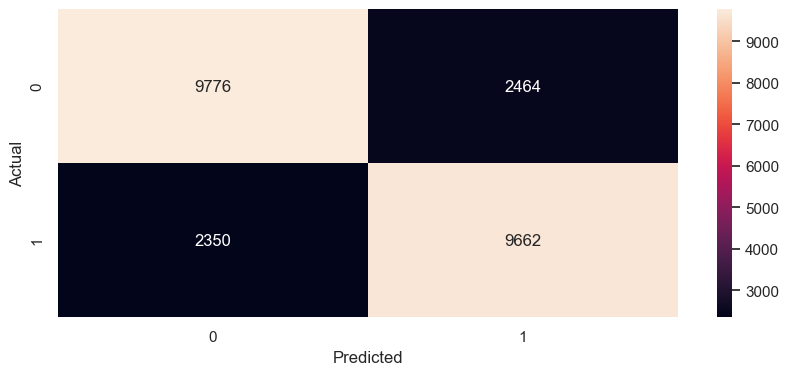

In [701]:
plt.figure(figsize=(10,4))
sns.heatmap(cm, annot= True, fmt = '.6g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [702]:
predicted_rfn = model_rfn.predict(xtest)
print(f"RandomForestClassifier model: \n {classification_report(predicted_rfn, ytest)}\n")

RandomForestClassifier model: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      6891
           1       0.72      0.38      0.50      2519

    accuracy                           0.79      9410
   macro avg       0.76      0.66      0.68      9410
weighted avg       0.78      0.79      0.77      9410




In [703]:
cross_val_score(RandomForestClassifier(n_estimators=100, min_samples_leaf=1,  random_state=0), xtest, ytest)

array([0.85919235, 0.86875664, 0.87194474, 0.85919235, 0.86238045])

In [704]:
cm1 = confusion_matrix(predicted_rfn, ytest)
cm1

array([[6523,  368],
       [1563,  956]], dtype=int64)

Text(92.25, 0.5, 'Actual')

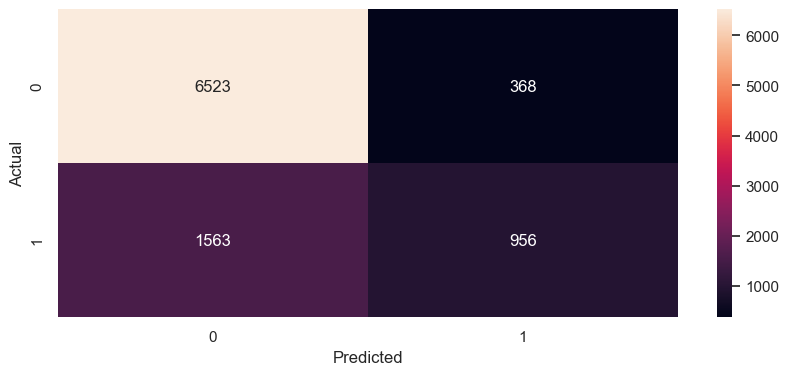

In [705]:
plt.figure(figsize=(10,4))
sns.heatmap(cm1, annot= True, fmt = '.6g')
plt.xlabel('Predicted')
plt.ylabel('Actual')